Analyzing the realibilty of a specific prdouct.
sample = 
time =
finding failure time.

In [28]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import warnings
import numpy as np

In [29]:
#specifying the sample size
size=15000
x = scipy.arange(size)

#generating real data

y = scipy.stats.beta.rvs(6,2,size=size,random_state=40)*50


<ipython-input-29-55d12e474699>:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  x = scipy.arange(size)


C:\Users\Anjil Adhikari\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Anjil Adhikari\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


rayleigh


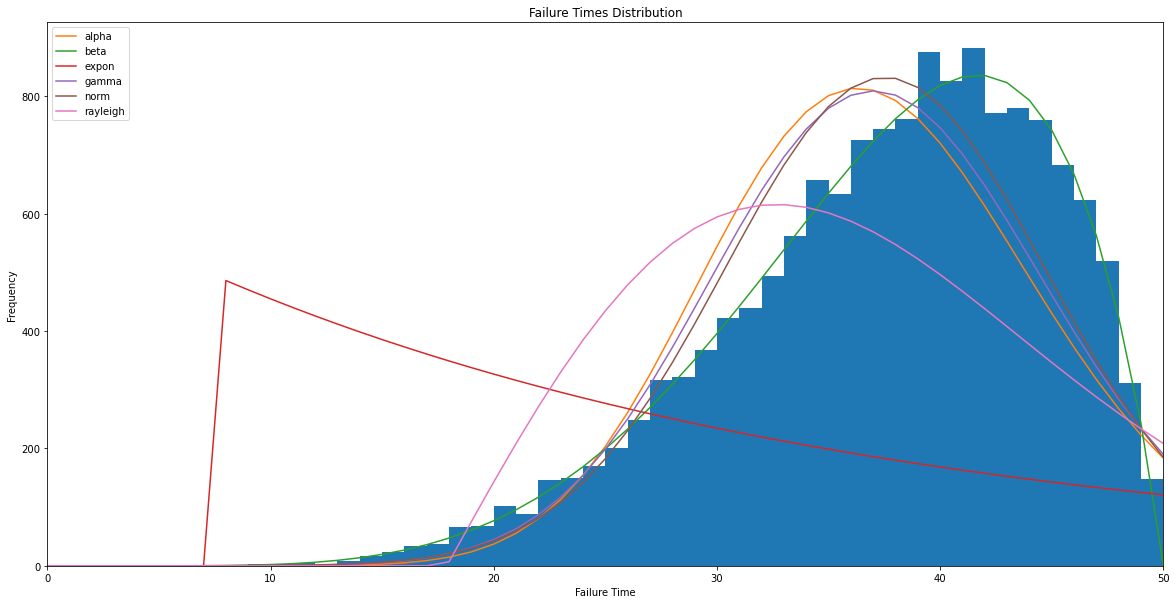

In [30]:
#plotting in histrogram
plt.figure(figsize=(20,10))
h=plt.hist(y,bins=range(51))

#types of distribution for fittings
dist_names = ['alpha', 'beta', 'expon', 'gamma', 'norm', 'rayleigh']
#alpha, beta, exponential, gamma, normal and Rayleigh distributions

#fitting with distribution and plotting their probability density functions

for dist_name in dist_names:
    dist = getattr(scipy.stats,dist_name)
    param=dist.fit(y)
    pdf_fitted = dist.pdf(x,*param[:-2],loc=param[-2],scale=param[-1])*size
    plt.plot(pdf_fitted,label=dist_name)
    plt.xlim(0,50)

print(dist_name)
plt.legend(loc='upper left')
plt.title("Failure Times Distribution")
plt.xlabel("Failure Time")
plt.ylabel("Frequency")
plt.show()


In [31]:
# Define the distribution with the best fit
dist = getattr(scipy.stats, 'beta')
param = dist.fit(y)

# Distribution parameters ( 'a', 'b' for beta distribution)
args = param[:-2]
loc = param[-2]
scale = param[-1]
print(args)

C:\Users\Anjil Adhikari\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(5.3986679532792365, 1.9417253628482722)


In [32]:
# Probability of failure before time t
print("Probability of failure before time 40:", round(scipy.stats.beta.cdf(40, *args, loc=loc, scale=scale)*100,2),"%")
# Probability of failure before time 40: 57.32 %

# Reliability estimation after time t
print("Reliability Estimation at time 40:", round(scipy.stats.beta.sf(40, *args, loc=loc, scale=scale)*100,2),"%")
# Reliability Estimation at time 40: 42.68 %

Probability of failure before time 40: 57.62 %
Reliability Estimation at time 40: 42.38 %
